# what is shap?

A game theoretic approach to explain the output of any machine learning model.






SHAP (SHapley Additive exPlanations) is based on Shapley values, a concept from cooperative game theory. It follows these key game theory principles:

### Characteristic Function Form

- In game theory, the characteristic function defines the value (or payoff) of a coalition (subset of players).

- In SHAP, this function is the ML model’s output, and the "players" are the features contributing to the prediction.

### Fair Distribution (Shapley Axioms)

SHAP satisfies four fairness axioms from game theory:

- Efficiency – SHAP values sum up to the difference between the model’s prediction and the expected output.

- Symmetry – If two features contribute equally, they get the same SHAP value.

- Dummy Property – A feature that does not change predictions gets a SHAP value of 0.

- Additivity – If two models are combined, SHAP values for features add up accordingly.

### Marginal Contribution Calculation

- SHAP evaluates all possible feature coalitions and computes the average marginal contribution of a feature across them.

- This ensures a fair attribution of importance to each feature.

Conclusion

SHAP follows cooperative game theory settings where features are "players", and the ML model’s prediction is the "payout" to be fairly distributed. 🚀

# why shap

- Linear models, for example, can use their coefficients as a metric for the overall importance of each feature, but they are scaled with the scale of the variable itself, which might lead to distortions and misinterpretations. 

- Also, the coefficient cannot account for the local importance of the feature, and how it changes with lower or higher values. The same can be said for feature importances of tree-based models, and this is why SHAP is useful for interpretability of models

 
 ## Step-by-Step: How SHAP Values Are Calculated
 
 1. **Choose the Instance to Explain**
    - Select a specific data point (row) for which you want to understand the model's prediction.
 
 2. **Enumerate All Possible Feature Coalitions**
    - For each feature, consider all possible subsets (coalitions) of the other features.
    - For a dataset with N features, there are 2^(N-1) possible coalitions for each feature.
 
 3. **Compute Model Predictions for Each Coalition**
    - For each coalition, create a version of the instance where only the features in the coalition are known (the rest are "missing" or replaced with background values).
    - Use the model to predict the output for each coalition.
 
 4. **Calculate Marginal Contribution**
    - For each coalition, measure how much the prediction changes when the feature of interest is added to the coalition.
    - Marginal contribution = Prediction with the feature included - Prediction without the feature.
 
 5. **Average Over All Coalitions (Weighted)**
    - For each feature, average its marginal contributions across all possible coalitions.
    - Each coalition is weighted according to the Shapley formula to ensure fairness.
 
 6. **Sum SHAP Values**
    - The sum of all SHAP values for the features equals the difference between the model's prediction for the instance and the average prediction over the background data.
 
 **Summary:**  
 SHAP values fairly distribute the difference between the model's prediction and the average prediction among the features, based on their contributions across all possible combinations.


In [4]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

c:\Users\senthil.marimuthu\OneDrive - HTC Global Services, Inc\self\gists\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LinearRegression()

# co-efficient plot

In [5]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


# partial dependence plot

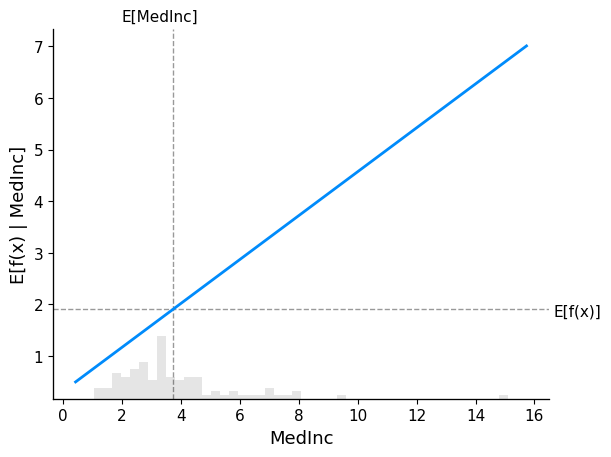

In [6]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

# explainer


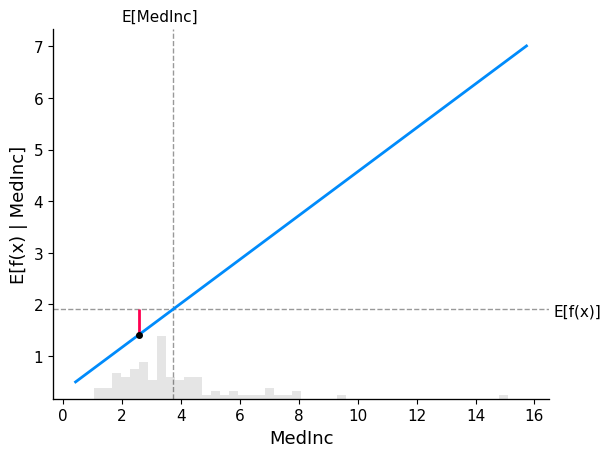

In [7]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],)

# local feature importance

it works on single datapointl. usually used in inference

### waterfall plot

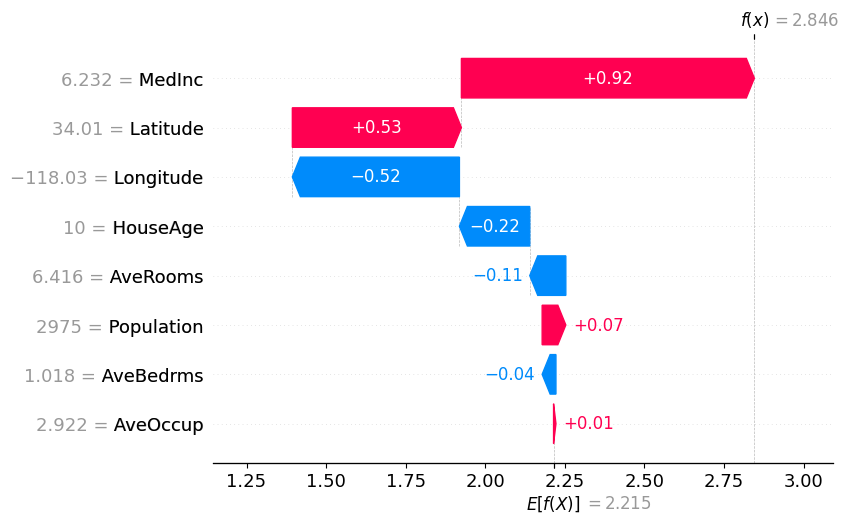

In [8]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In the waterfall above, the x-axis has the values of the target (dependent) variable which is the house price. x is the chosen observation, f(x) is the predicted value of the model, given input x and E[f(x)] is the expected value of the target variable, or in other words, the mean of all predictions (mean(model.predict(X))).

The SHAP value for each feature in this observation is given by the length of the bar. In the example above, Longitude has a SHAP value of -0.52, Latitude has a SHAP of +0.53 and so on. The sum of all SHAP values will be equal to E[f(x)] — f(x).

### bar plot

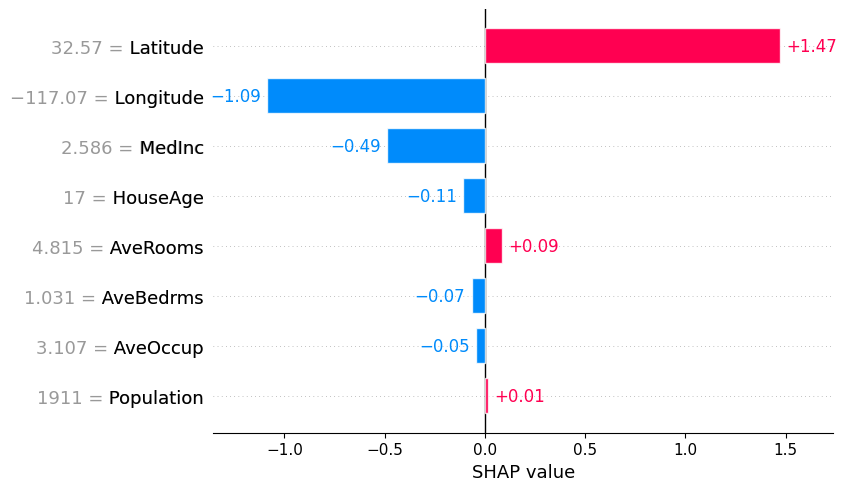

In [12]:
shap.plots.bar(shap_values[sample_ind])


### force plot

In [16]:
shap.plots.force(shap_values[sample_ind])


# Global feature importance plots

it works on training dataset

### feature importance (swarm plot)

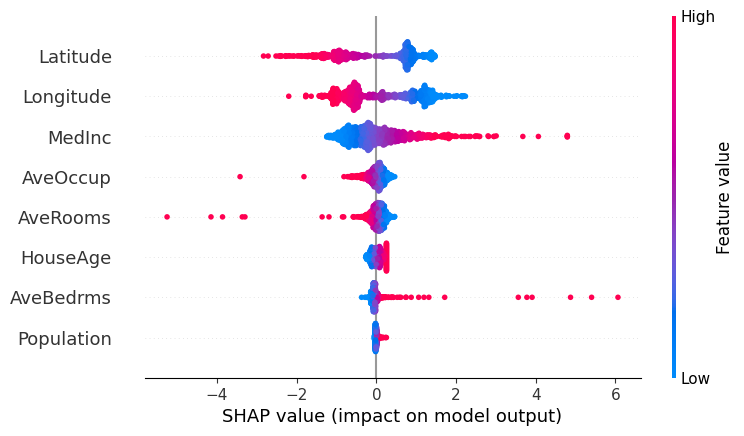

In [8]:
shap.plots.beeswarm(shap_values)  # this needs whole dataset, not single data point


### feature importance (violin plot)

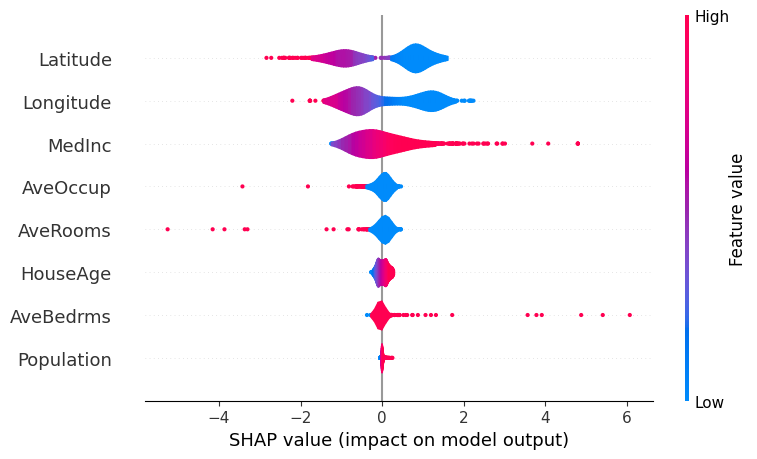

In [10]:
shap.summary_plot(shap_values, plot_type='violin') # similar to swarm plot


### feature importance (bar plot)

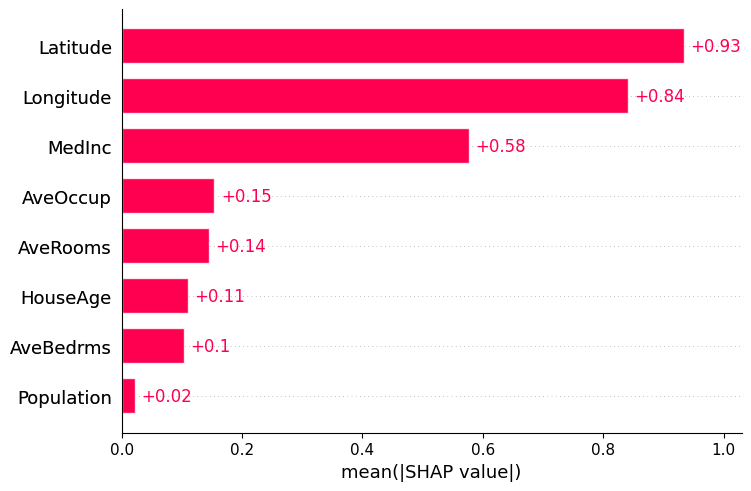

In [9]:
shap.plots.bar(shap_values)
